# Ejercicio 2

## Ejercicio 2.1

**1) Generar mediante el método de aceptación/rechazo 10000 valores de una variable aleatoria que se distribuye según la función densidad de probabilidad siguiente. Dibuja el histograma de valores generados (10000 aceptados). ¿Cuál es la eficiencia en la generación?**

$f(x)=\frac{5}{4-ln(5)}\frac{log(x)}{x^2}$ con $x\in[1, 5]$.

Para generar los datos con el metodo de aceptacion rechazo, primero genero un número aleatorio entre el rango designado, y después generaré otro número aleatorio esta vez entre 0 y $\frac{5}{4-ln(5)}$, que es el valor máximo que esta función puede adquirir en este rango de valores.

Tras eso simplemente tocará ver si aceptamos el valor de x fijándonos en si y <= fx. Este proceso lo repetiré hasta conseguir un total de 10000 valores aceptados.

In [2]:
x_accepted <- 0
nx = 1
count = 0
while(nx <= 10000){
    count = count + 1
    x <- runif(1, 1, 5) 
    y <- runif(1, 0, 5/(4-log(5))) 
    fx = (5/(4-log(5)))*(log(x)/(x*x)) 
    if (y <= fx){ 
        x_accepted[nx] = x
        nx = nx + 1
    } 
}

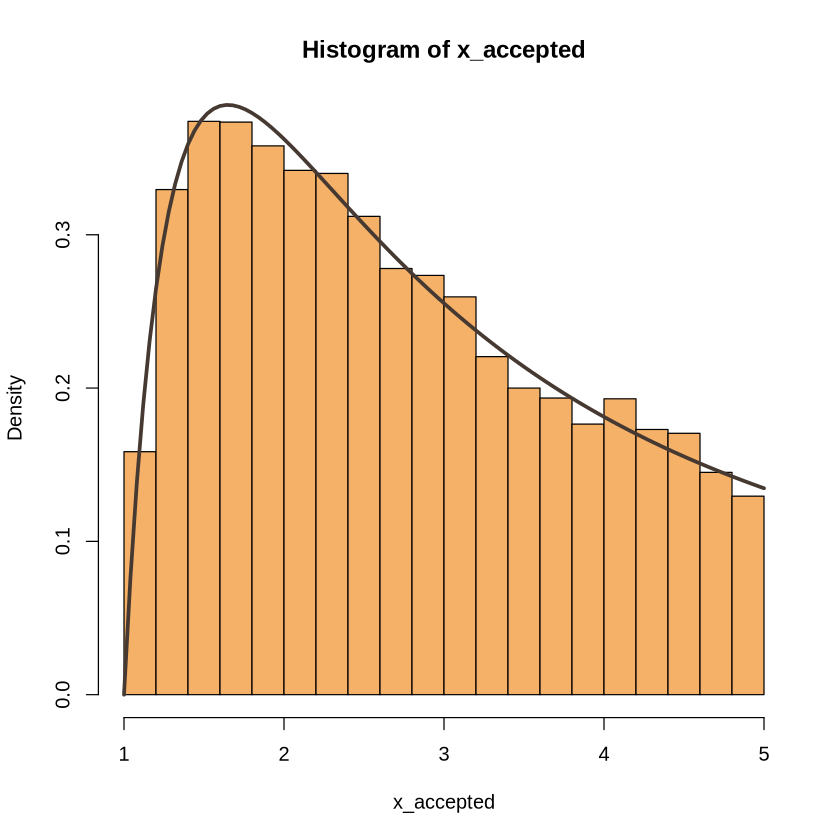

In [3]:
hist(x_accepted, freq = F, col = '#F5B167')
curve((5/(4-log(5)))*(log(x)/(x*x)), from = 1, to = 5, col = '#463932', add = T, lwd = 3)

In [4]:
eff <- length(x_accepted)/count
eff

[1] 0.1199271

Como observamos, la eficiencia en la generación con este algoritmo es bastante pequeña con apenas un 12% de aceptación.

**2) Repite el apartado anterior con un algoritmo de Metrópolis, escogiendo una 'jumping distribution' que te permita obtener mayor eficiencia.** 

Al igual que en el apartado anterior definiré la función que quiero que sigan mis datos y generaré valores hasta conseguir 10000 aceptaciones aunque en este caso, el método varia un poco. Empezando con una x de 1.5 propongo cambios a partir de una distribución normal, tal que los acepto si el valor de $f(x)$ para el nuevo$(x^*)$ es mayor que antes, o si no lo es, lo acepto con una probabilidad $f(x^*)/f(x)$.

In [73]:
funcion <- function(x) { # Definimos la función objetivo
    value <- (5/(4-log(5))) * (log(x)/(x*x)) 
    return(value)
}

# Inicializamos los valores
N <- 10000
target_x <- numeric(N) # Vector para almacenar los valores aceptados

x <- 1.5 # Un valor inicial válido dentro del dominio de la función
count2 <- 0
k <- 1
while(k <= N) {
    count2 <- count2 + 1
    x_star <- x + rnorm(1, 0, 0.2) # Proponemos un nuevo valor para x
    
    # Aseguramos que x_star esté dentro del dominio válido
    if(x_star < 1 | x_star > 5) next
    
    # Definimos la probabilidad con la que se aceptarán los nuevos valores
    if(runif(1) < funcion(x_star)/funcion(x)) {
        x <- x_star
        target_x[k] <- x
        k <- k + 1    
    }
}

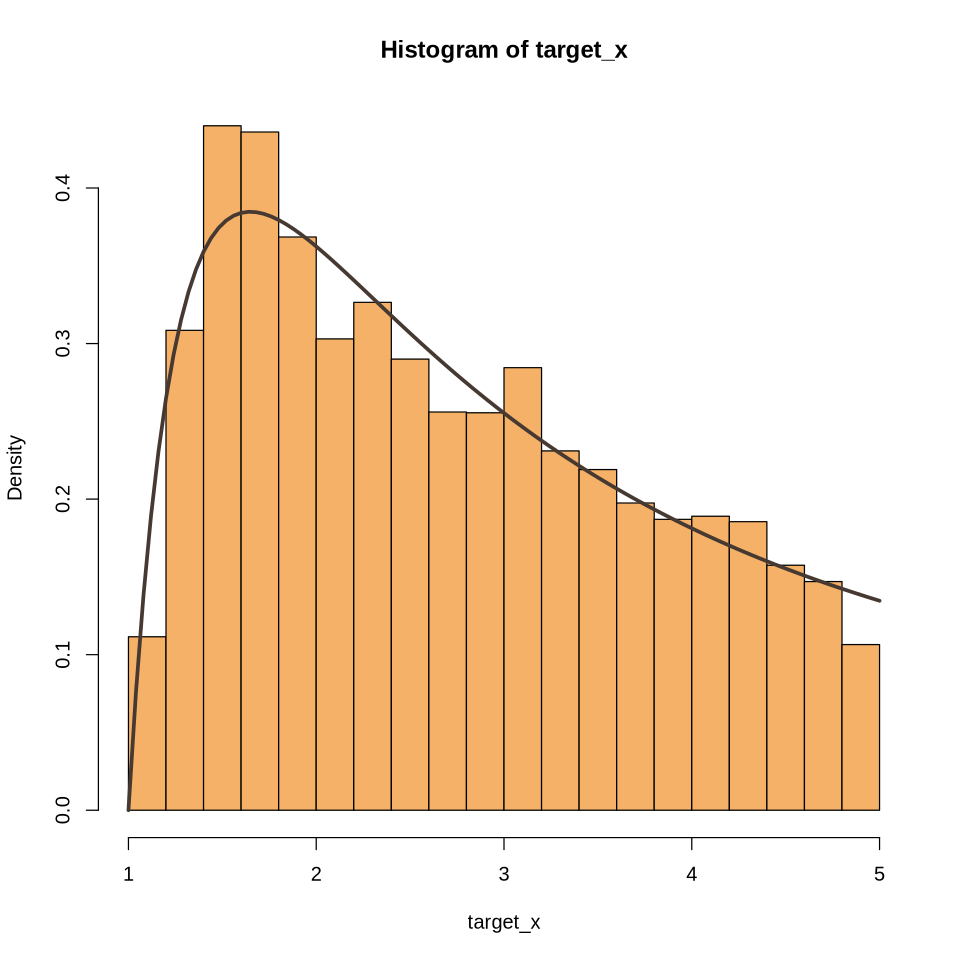

In [74]:
hist(target_x, freq = F, col = '#F5B167')
curve((5/(4-log(5)))*(log(x)/(x*x)), from = 1, to = 5, col = '#463932', add = T, lwd = 3)

In [75]:
eff <- length(target_x)/count2
eff

[1] 0.9390553

Como observamos la eficiciencia de este algoritmo es inmensamente mejor que la del anterior con una aceptacion de más del 90%.

## Ejercicio 2.2

**Un grupo de meteorologos recoge los datos de humedad y temperatura que se producen en una ciudad durante un cierto periodo de tiempo. (tempXhum.csv)**

**Realizando un breve análisis observan que ambas variables están altamente correlacionadas. Ahora, quieren generar nuevos datos sintéticos que sigan las mismas distribuciones y que mantengan la correlación que existe entre ellas.**

**3) Genera 10000 valores de temperatura y humedad mediante un algoritmo de Metrópolis partiendo de un histograma 2D con 20 bins en cada eje (10000 valores aceptados). Comparar los histogramas de las variables generadas con los datos originales y calcular la eficiencia en la generación.**

In [4]:
dtf = read.csv(file='tempXhum.csv', header=TRUE, sep=',', dec='.')

In [5]:
str(dtf)

'data.frame':	10000 obs. of  3 variables:
 $ X          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ temperatura: num  12.1 12 12.1 12 11.5 ...
 $ humedad    : num  27.1 27.6 27.5 27.8 29.3 ...


In [6]:
summary(dtf)

       X          temperatura         humedad       
 Min.   :    1   Min.   : 0.2964   Min.   : 0.3258  
 1st Qu.: 2501   1st Qu.: 8.3895   1st Qu.:21.4784  
 Median : 5000   Median :12.0759   Median :29.0107  
 Mean   : 5000   Mean   :12.0808   Mean   :28.6284  
 3rd Qu.: 7500   3rd Qu.:15.8043   3rd Qu.:35.8871  
 Max.   :10000   Max.   :23.6251   Max.   :58.8903  

In [58]:
sd(dtf$temperatura)
sd(dtf$humedad)

[1] 4.822745

[1] 10.31806

Observamos como el dataset se conforma de 3 columnas, siendo una de estas un índice por lo que no la tendremos en cuenta. Por el resto apreciamos como las temperaturas se mueven alrededor de los 12 grados de media y 4.8 de desviacion y la humedad alrededor del 28% con algo mas del 10 de desviacion.

In [7]:
cor(dtf)

,X,temperatura,humedad
X,1.00000000,0.05905562,0.1662544
temperatura,0.05905562,1.00000000,-0.1769680
humedad,0.16625440,-0.17696803,1.0000000


En este análisis de correlaciones observamos algo un poco distinto a lo que se nos comenta en el enunciado puesto que no se aprecia esa fuerte correlacion de la que se nos habla.


----------------------------
2-D Histogram Object
----------------------------

Call: hist2d(x = dtf["temperatura"], y = dtf["humedad"], nbins = 20, 
    col = colores, xlab = "Temperatura", ylab = "Humedad")

Number of data points:  10000 
Number of grid bins:  20 x 20 
X range: ( 0.2963501 , 23.62508 )
Y range: ( 0.3257692 , 58.89028 )


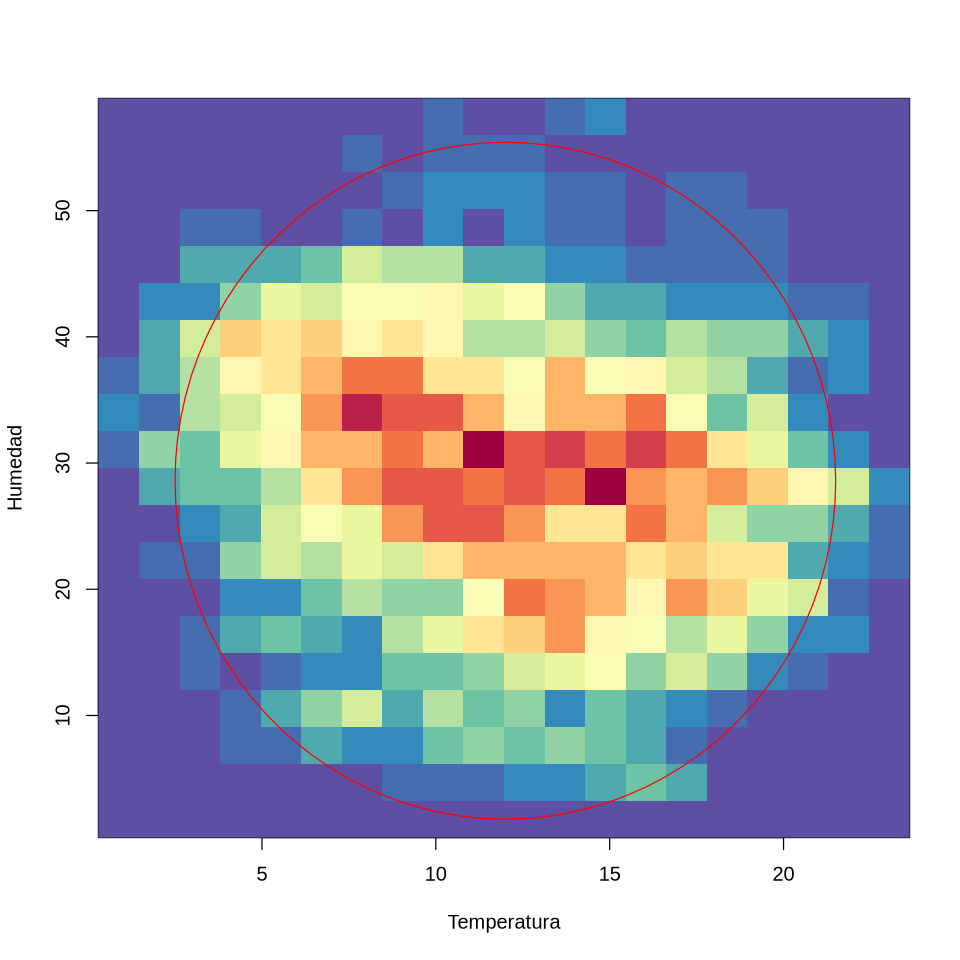

In [140]:
#install.packages('plotrix')
library(plotrix) # Para draw.circle

colores <- colorRampPalette(rev(brewer.pal(11, "Spectral")))(20)
hist2d(dtf['temperatura'], dtf['humedad'], nbins = 20, col = colores, xlab = 'Temperatura', ylab = 'Humedad')

# Añadiendo un círculo
# Define el centro y el radio del círculo
centro_x <- 12
centro_y <- 28.6
radio <- 9.5

# Dibujando el círculo sobre el histograma
draw.circle(centro_x, centro_y, radio, border = "red")

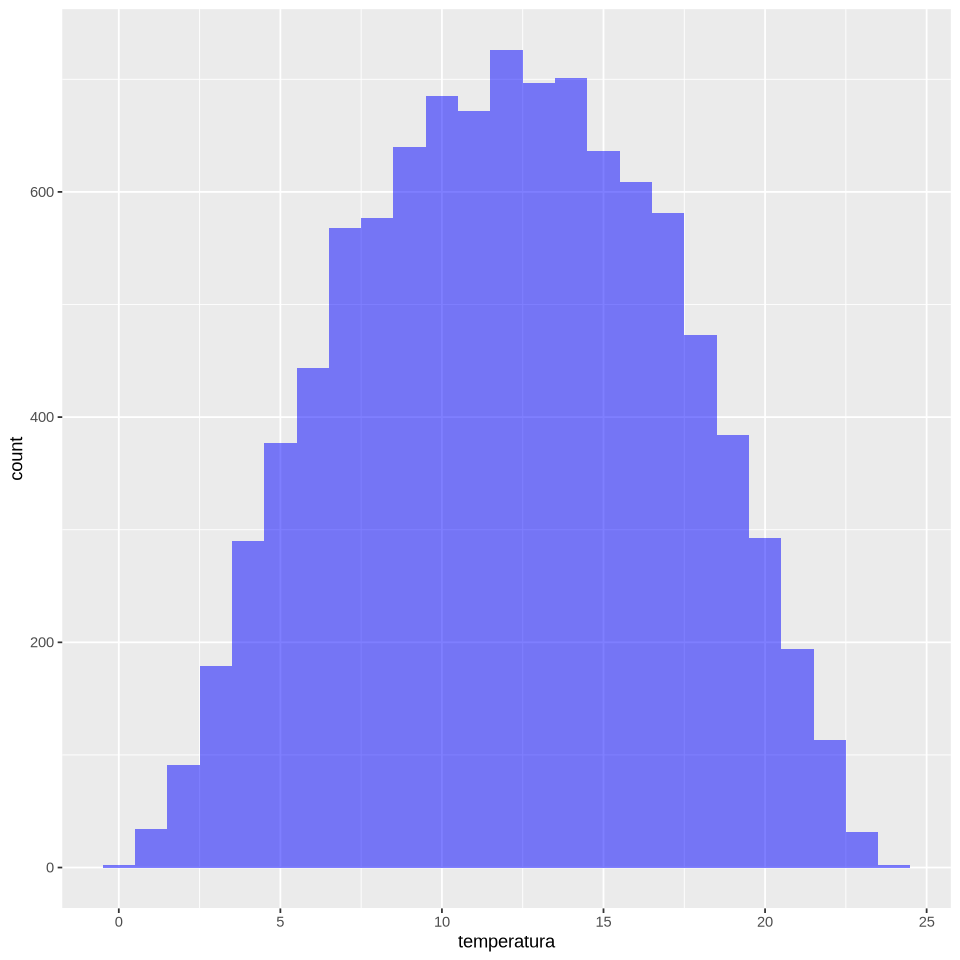

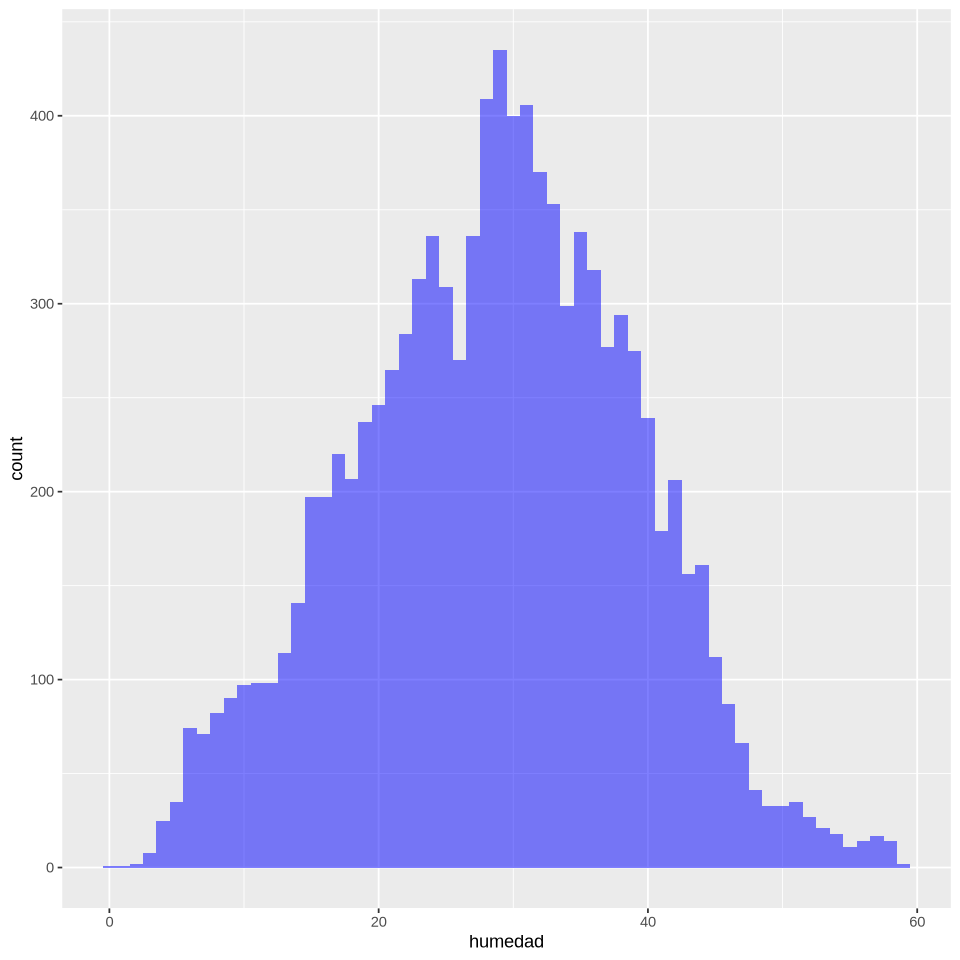

In [53]:
ggplot() +
  geom_histogram(data = dtf, aes(x = temperatura), binwidth = 1, fill = "blue", alpha = 0.5)
ggplot() +
  geom_histogram(data = dtf, aes(x = humedad), binwidth = 1, fill = "blue", alpha = 0.5)

Vemos como las temperaturas y humedades parecen seguir la distribucion de un circulo, pero parece ser que es debido a que cada una de ellas de forma individual sigue una normal. Para la generacion de los puntos mediante el algoritmo de metropolis probaré 3 approaches distintos, el primero sera tratando de generar puntos de temperatura y humedad que sigan una normal, el segundo usando el area del circulo, y el tercero usando la propia distribucion de los datos.

In [223]:
set.seed(900)

dens <- function(x,y){
    a <- (1 / (4.8 * sqrt(2 * pi))) * exp(-0.5 * ((x - 12) / 4.8)^2)
    b <- (1 / (10.3 * sqrt(2 * pi))) * exp(-0.5 * ((y - 28.6) / 10.3)^2)
    return (a + b)
}

x = 12
y = 38
N = 10000
target_x <- numeric(N)
target_y <- numeric(N)
k = 1
counter <- 0

while(k <= N){
    counter <- counter + 1
    x_star = x + rnorm(1, 0, 0.5) #generamos los nuevos valores x* e y*
    y_star = y + rnorm(1, 0, 0.5)

    if(x_star <= 0 | x_star > 25 | y_star <= 0 | y_star > 60) next
    
    if(runif(1) < dens(x_star, y_star)/dens(x,y)){ #definimos la probabilidad con la que se aceptarán los nuevos valores
        x = x_star
        y = y_star
        target_x[k] <- x
        target_y[k] <- y
        k = k + 1    
    }
          
}

[1] "Eficiencia de generación Temperatura: 0.977708251857646"


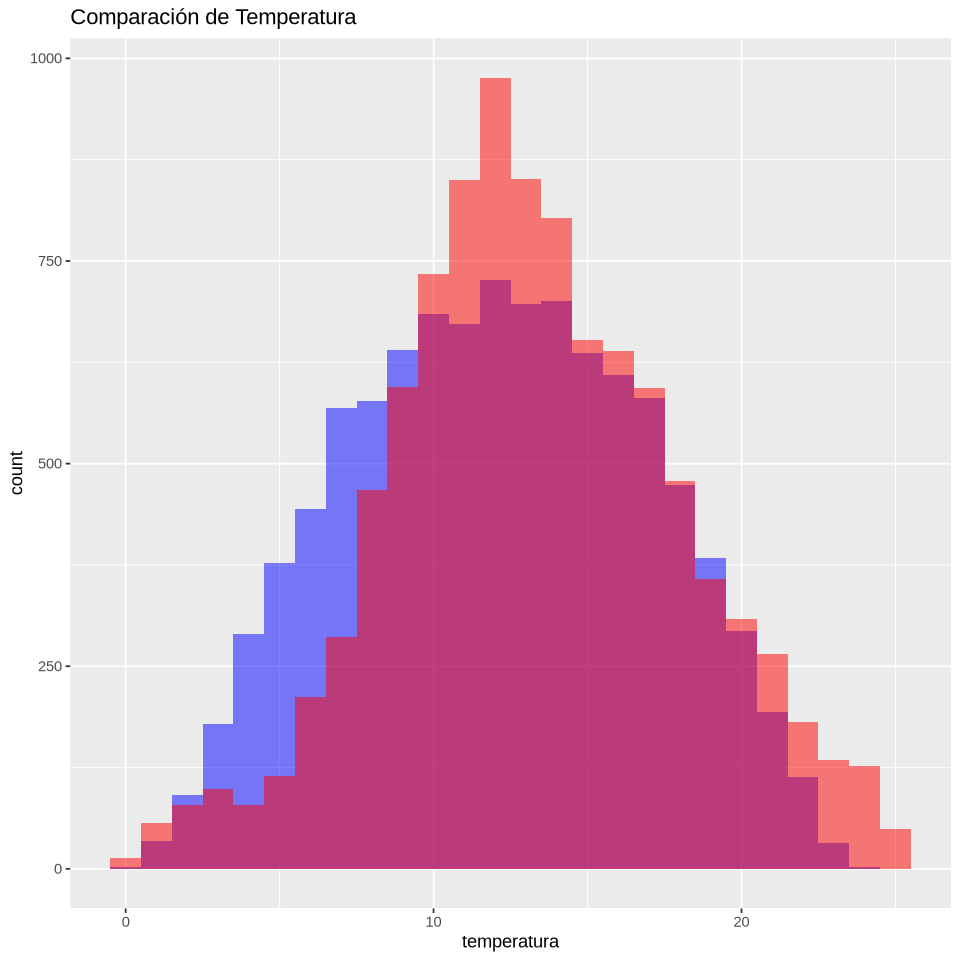

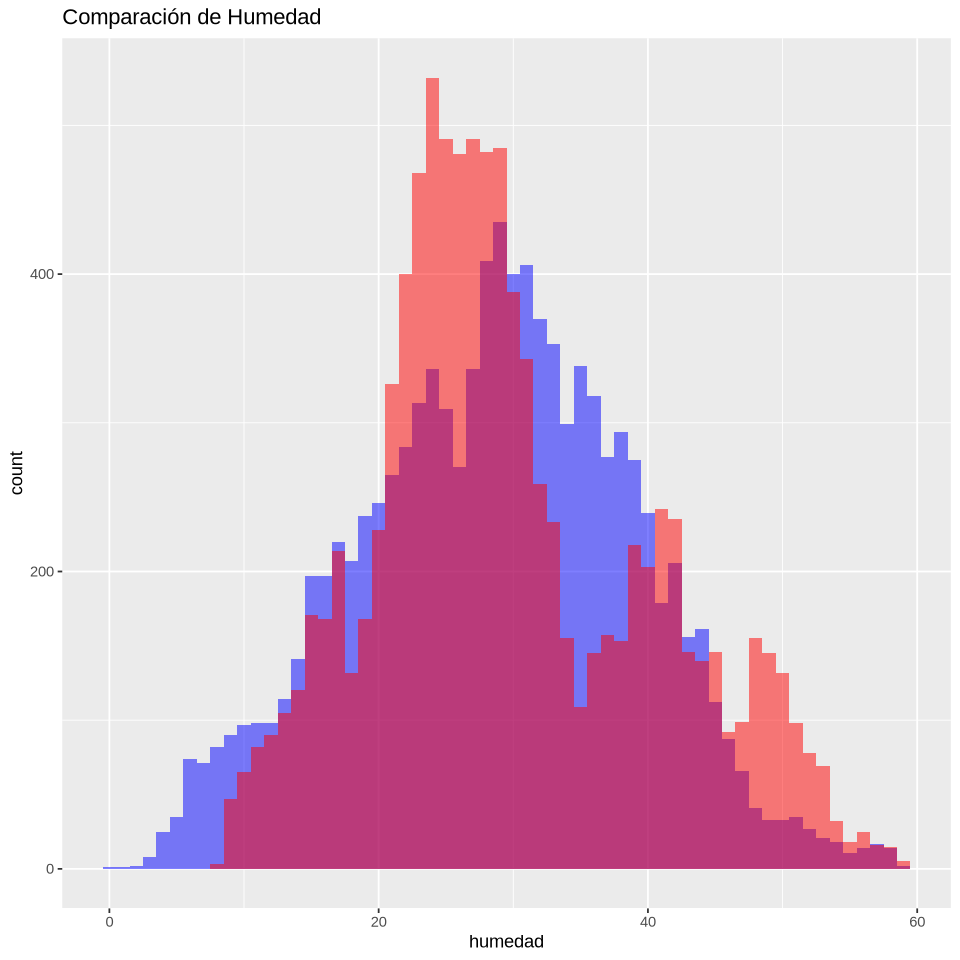

In [224]:
# Calcular y mostrar la eficiencia
print(paste("Eficiencia de generación Temperatura:", N/counter ))


# Crear un data frame con los resultados
datos_generadosT <- data.frame(temperatura = target_x)
datos_generadosH <- data.frame(humedad = target_y)

# Comparar los histogramas
ggplot() +
  geom_histogram(data = dtf, aes(x = temperatura), binwidth = 1, fill = "blue", alpha = 0.5) +
  geom_histogram(data = datos_generadosT, aes(x = temperatura), binwidth = 1, fill = "red", alpha = 0.5) +
  ggtitle("Comparación de Temperatura")

ggplot() +
  geom_histogram(data = dtf, aes(x = humedad), binwidth = 1, fill = "blue", alpha = 0.5) +
  geom_histogram(data = datos_generadosH, aes(x = humedad), binwidth = 1, fill = "red", alpha = 0.5) +
  ggtitle("Comparación de Humedad")


----------------------------
2-D Histogram Object
----------------------------

Call: hist2d(x = target_x, y = target_y, nbins = 25, col = r, xlab = "x", 
    ylab = "y")

Number of data points:  10000 
Number of grid bins:  25 x 25 
X range: ( 0.015264 , 24.98507 )
Y range: ( 8.078284 , 59.00945 )


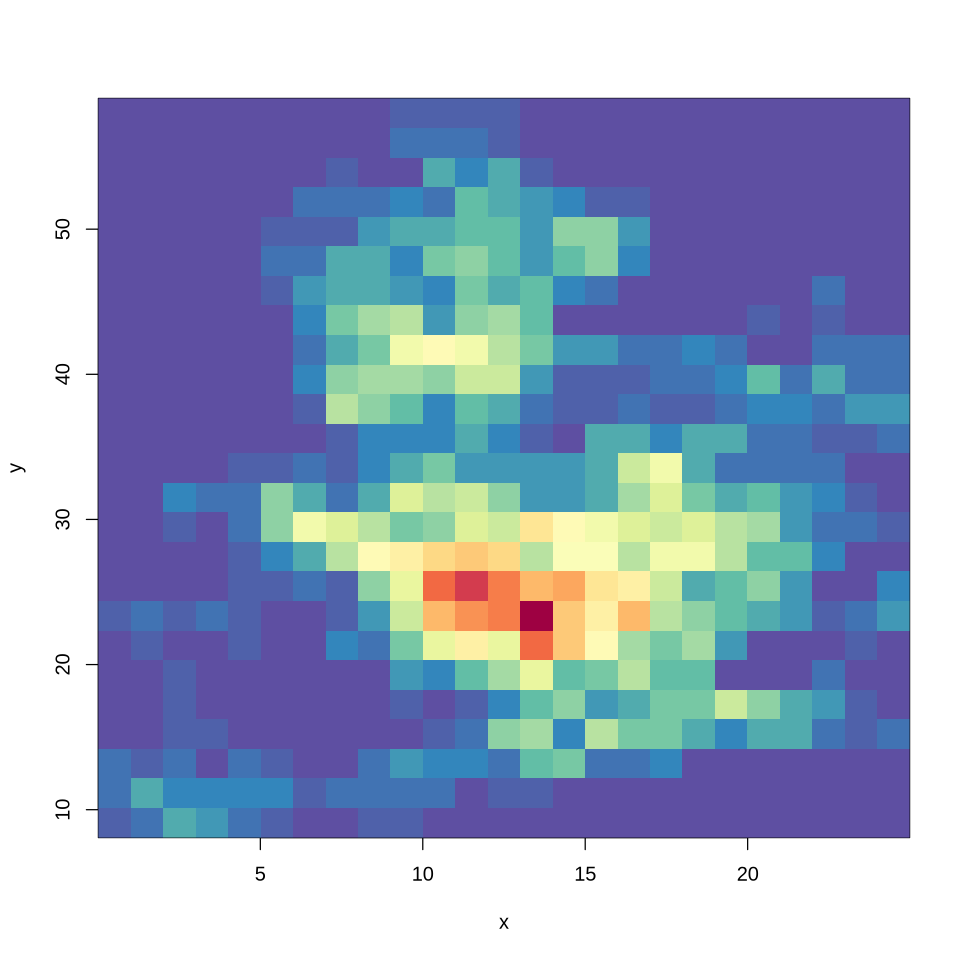

In [225]:
rf <- colorRampPalette(rev(brewer.pal(11,'Spectral')))
r <- rf(32)
options(repr.plot.width = 8, repr.plot.height = 8)
hist2d(target_x, target_y, nbins = 25, col = r, xlab = 'x', ylab = 'y')

Como observamos, mediante la generacion por normales, obtenemos una eficiencia en la generacion realmente buena del 97%, y a traves de los histogramas observamos como los datos generados no difieren muhco de los reales, sin embargo al generar el histograma 2d observamos como no es muy parecido al que los datos originales proporcionaban.

Ahora generaré los puntos mediante la funcion del circulo.

In [211]:
circle <- function(x,y){ #definimos la función del círculo
    value = -(x - 12)**2 - (y - 28.6)**2 + 90
    return(value)
}

#inicializamos los valores

x = 10
y = 20

N = 10000


target_x <- numeric(N)
target_y <- numeric(N)

k = 1

counter <- 0
while(k <= N){
    counter <- counter + 1
    x_star = x + rnorm(1, 0, 5) #generamos los nuevos valores x* e y*
    y_star = y + rnorm(1, 0, 10)

    if(x_star <= 0 | x_star > 25 | y_star <= 0 | y_star > 60) next
    
    if(runif(1) < circle(x_star, y_star)/circle(x,y)){ #definimos la probabilidad con la que se aceptarán los nuevos valores
        x = x_star
        y = y_star
        target_x[k] <- x
        target_y[k] <- y
        k = k + 1    
    }
          
}

[1] "Eficiencia de generación Temperatura: 0.330534805315"


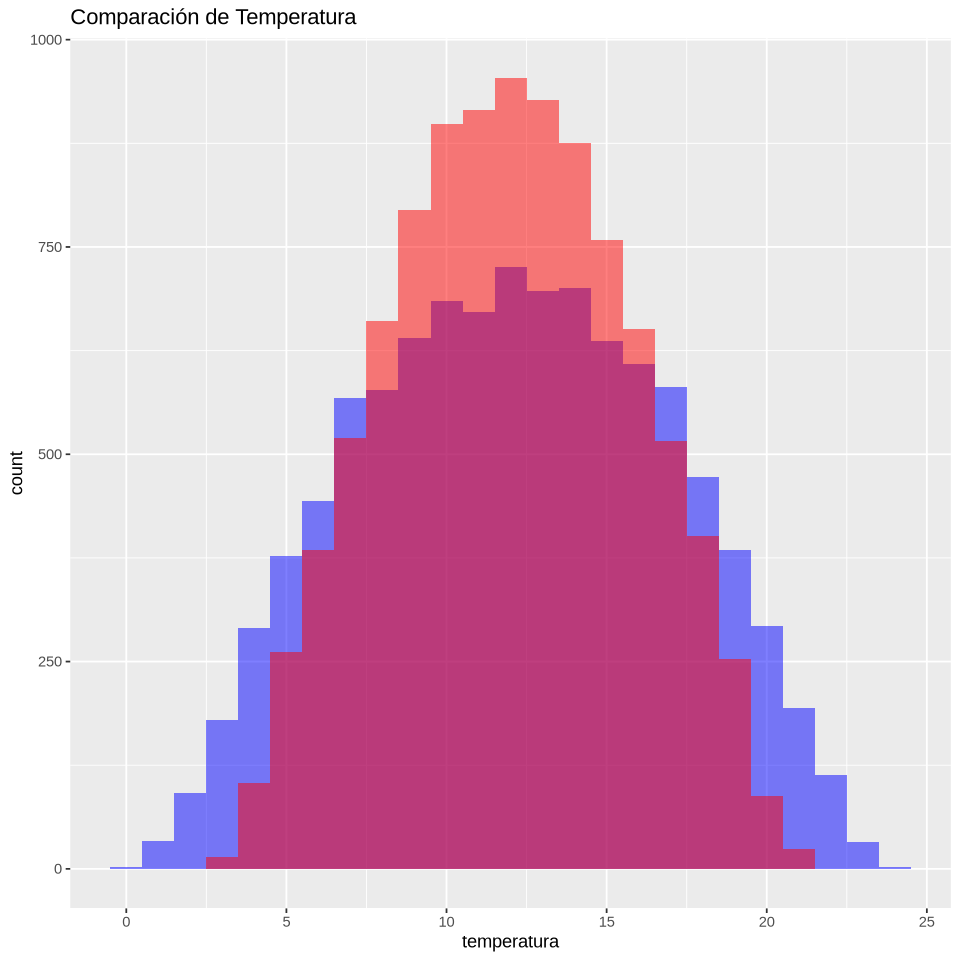

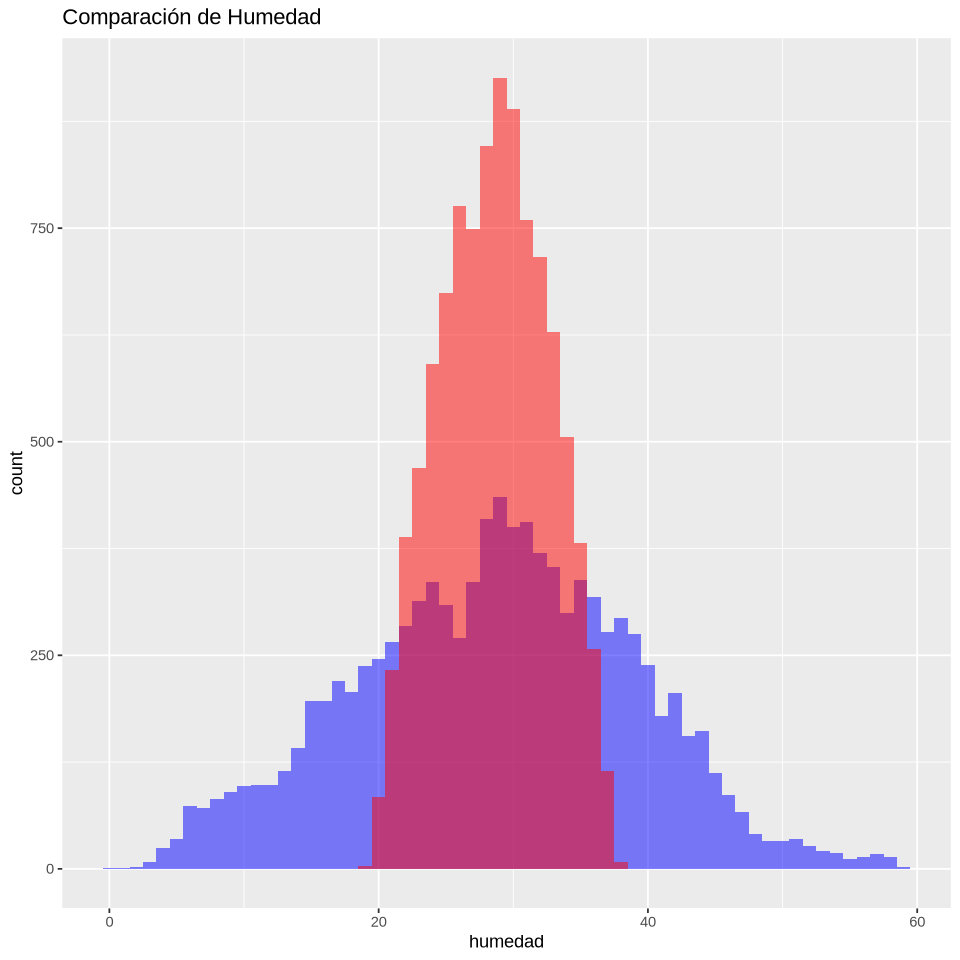

In [212]:
# Calcular y mostrar la eficiencia
print(paste("Eficiencia de generación Temperatura:", N/counter ))


# Crear un data frame con los resultados
datos_generadosT <- data.frame(temperatura = target_x)
datos_generadosH <- data.frame(humedad = target_y)

# Comparar los histogramas
ggplot() +
  geom_histogram(data = dtf, aes(x = temperatura), binwidth = 1, fill = "blue", alpha = 0.5) +
  geom_histogram(data = datos_generadosT, aes(x = temperatura), binwidth = 1, fill = "red", alpha = 0.5) +
  ggtitle("Comparación de Temperatura")

ggplot() +
  geom_histogram(data = dtf, aes(x = humedad), binwidth = 1, fill = "blue", alpha = 0.5) +
  geom_histogram(data = datos_generadosH, aes(x = humedad), binwidth = 1, fill = "red", alpha = 0.5) +
  ggtitle("Comparación de Humedad")


----------------------------
2-D Histogram Object
----------------------------

Call: hist2d(x = target_x, y = target_y, nbins = 25, col = r, xlab = "x", 
    ylab = "y")

Number of data points:  10000 
Number of grid bins:  25 x 25 
X range: ( 2.791436 , 21.33698 )
Y range: ( 19.36079 , 37.84876 )


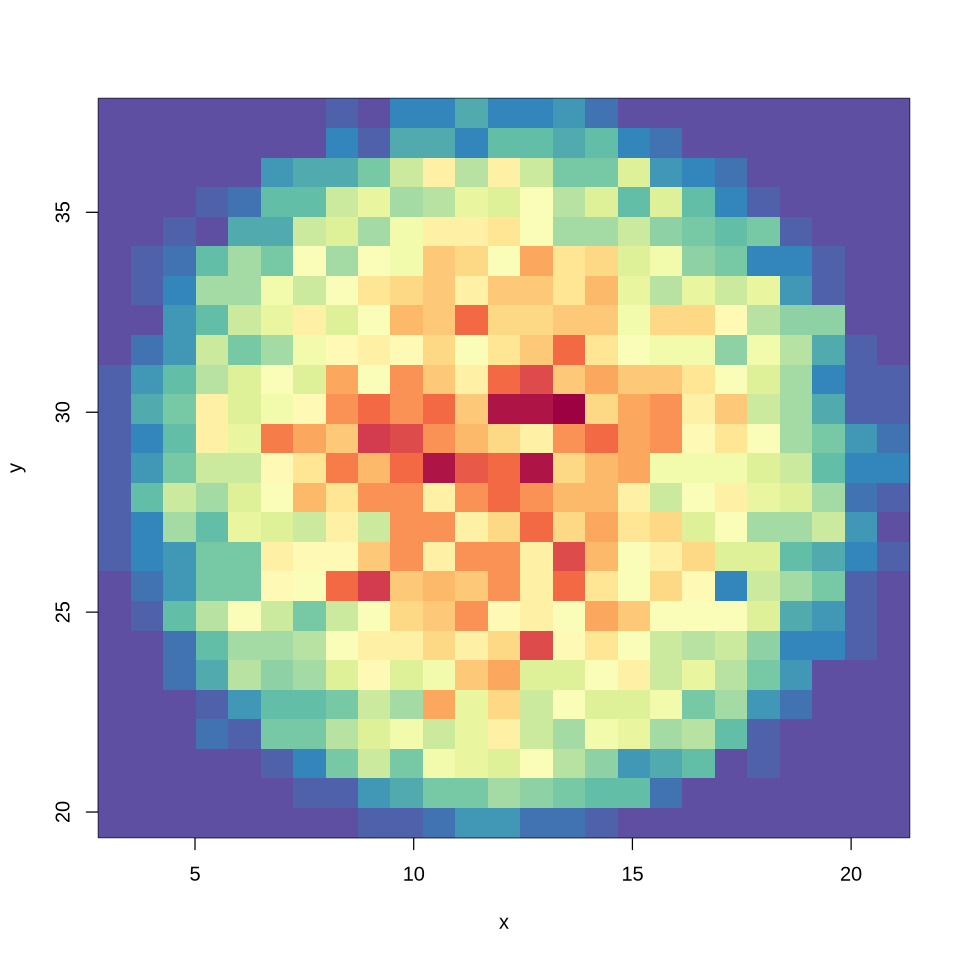

In [213]:
rf <- colorRampPalette(rev(brewer.pal(11,'Spectral')))
r <- rf(32)
options(repr.plot.width = 8, repr.plot.height = 8)
hist2d(target_x, target_y, nbins = 25, col = r, xlab = 'x', ylab = 'y')

Observamos como los datos de temperatura que genera son practicamente identicos a los de la distribucion original, sin embargo la humedad nos da un resultado bastante diferente al deshacerse de las colas de la normal. El resultado final del histograma 2d nos ofrece un circulo, que mas o menos se parece un poco más que los anteriores datos, pero no demasiado y con una eficiencia de generación del 33%.

In [1]:
Por último ahora usaré la propia distribucion de los datos originales para generar los puntos.

ERROR: Error in parse(text = x, srcfile = src): <text>:1:5: unexpected symbol
1: Por último
        ^


[1] "Eficiencia de generación: 0.00614492183659424"


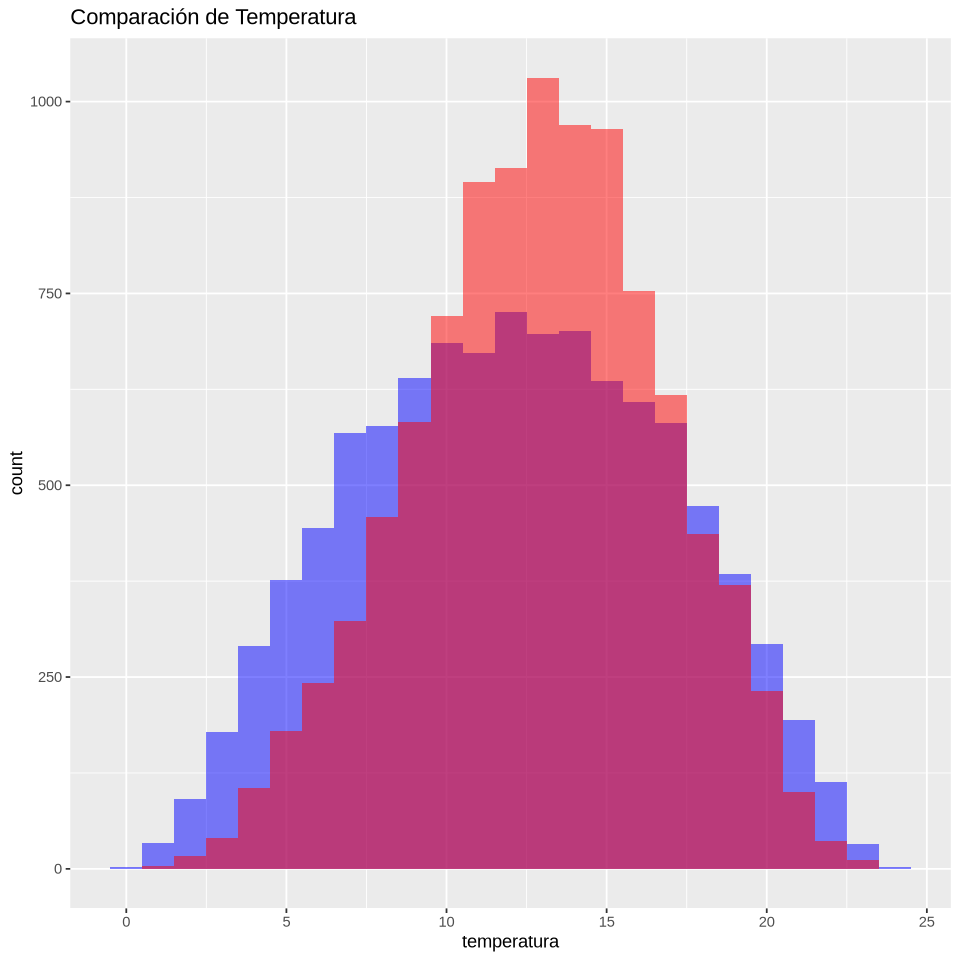

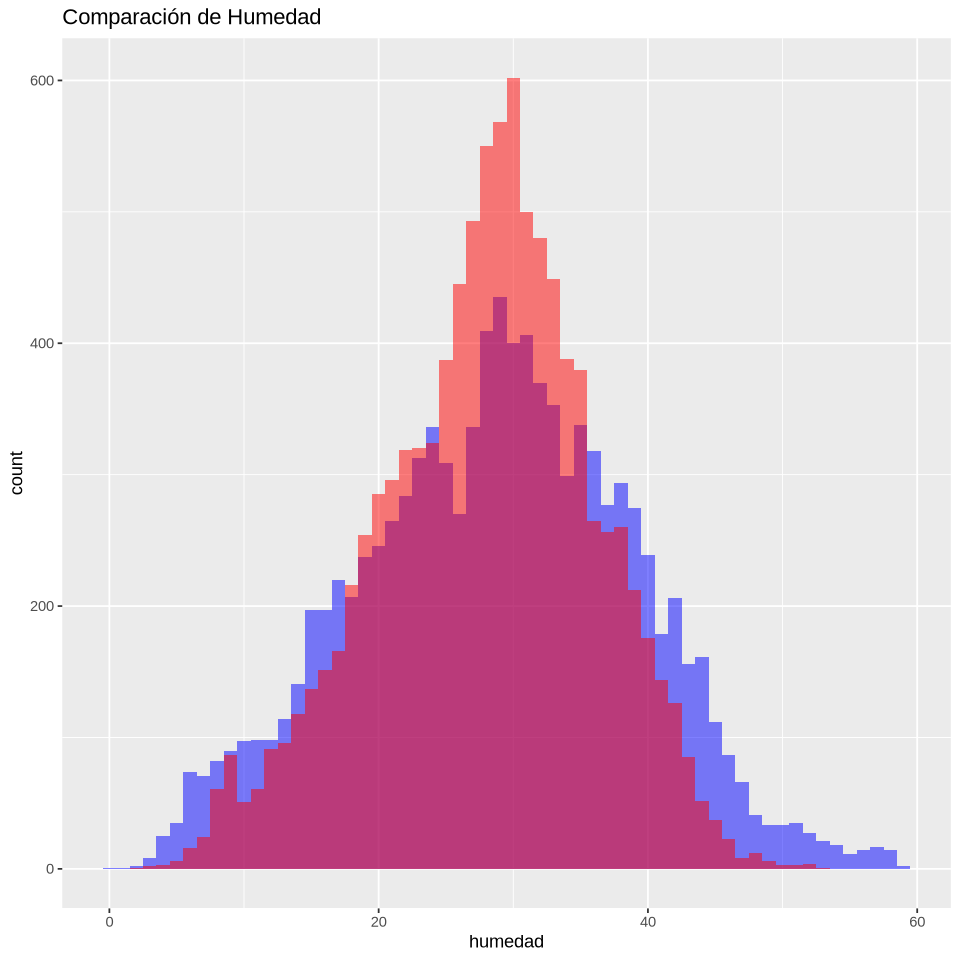

In [238]:
library(ggplot2)
library(dplyr)

# Leer los datos originales

# Implementar el algoritmo de Metrópolis
metropolis <- function(data, N, prop_std) {
  temperatura <- numeric(N)
  humedad <- numeric(N)
  aceptaciones <- 0
  
  # Punto inicial
  idx <- sample(1:nrow(data), 1)
  current_temperatura <- data$temperatura[idx]
  current_humedad <- data$humedad[idx]

  i <- 0
  
  while (aceptaciones < N) {
    propuesta_temperatura <- current_temperatura + rnorm(1, 0, prop_std)
    propuesta_humedad <- current_humedad + rnorm(1, 0, prop_std)
    
    # Aceptar o rechazar la propuesta
    idx_compare <- sample(1:nrow(data), 1)
    ratio <- exp(-abs(propuesta_temperatura - data$temperatura[idx_compare]) - 
                 abs(propuesta_humedad - data$humedad[idx_compare]))
                 
    if (runif(1) < ratio) {
      current_temperatura <- propuesta_temperatura
      current_humedad <- propuesta_humedad
      aceptaciones <- aceptaciones + 1

      temperatura[aceptaciones] <- current_temperatura
      humedad[aceptaciones] <- current_humedad

    }   
    i <- i + 1
  }


  
  list(temperatura = temperatura, humedad = humedad, eficiencia = aceptaciones / i)
}

# Generar los datos
set.seed(42) # Para reproducibilidad
resultado <- metropolis(dtf, 10000, 1)

# Calcular y mostrar la eficiencia
print(paste("Eficiencia de generación:", resultado$eficiencia))

# Crear un data frame con los resultados
datos_generados <- data.frame(temperatura = resultado$temperatura, humedad = resultado$humedad)

# Comparar los histogramas
ggplot() +
  geom_histogram(data = dtf, aes(x = temperatura), binwidth = 1, fill = "blue", alpha = 0.5) +
  geom_histogram(data = datos_generados, aes(x = temperatura), binwidth = 1, fill = "red", alpha = 0.5) +
  ggtitle("Comparación de Temperatura")

ggplot() +
  geom_histogram(data = dtf, aes(x = humedad), binwidth = 1, fill = "blue", alpha = 0.5) +
  geom_histogram(data = datos_generados, aes(x = humedad), binwidth = 1, fill = "red", alpha = 0.5) +
  ggtitle("Comparación de Humedad")


----------------------------
2-D Histogram Object
----------------------------

Call: hist2d(x = datos_generados["temperatura"], y = datos_generados["humedad"], 
    nbins = 20, col = r, xlab = "x", ylab = "y")

Number of data points:  10000 
Number of grid bins:  20 x 20 
X range: ( 0.6960581 , 23.17245 )
Y range: ( 2.128493 , 52.65321 )


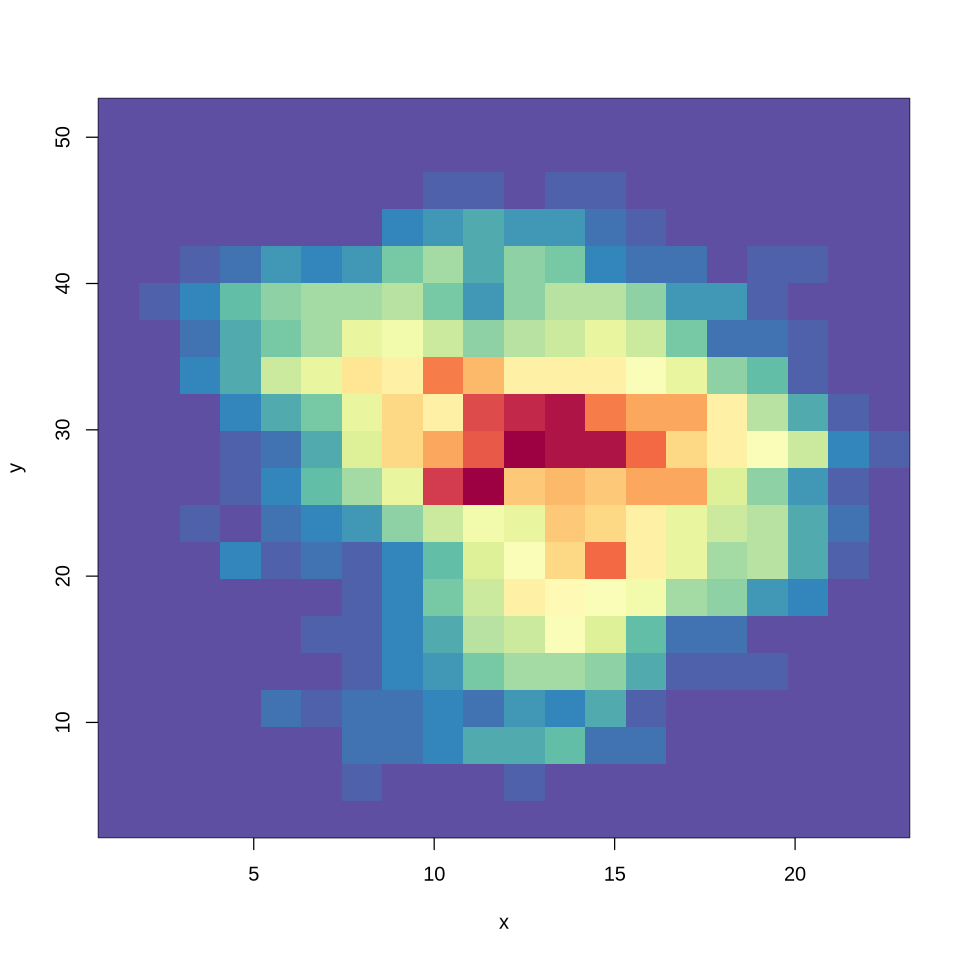

In [239]:
rf <- colorRampPalette(rev(brewer.pal(11,'Spectral')))
r <- rf(32)
options(repr.plot.width = 8, repr.plot.height = 8)
hist2d(datos_generados['temperatura'], datos_generados['humedad'], nbins = 20, col = r, xlab = 'x', ylab = 'y')

Como observamos esta manera de generar los datos es la que nos proporciona el resultado mas fiel a los datos originales, sin embargo su eficiencia de generacion es realmente baja apenas llegando al 0.6%.

En conclusion, dependiendo de lo que busquemos nos quedariamos con una opcion u otra. Si buscamos datos que se adhieran muy bien a la distribucion original, usaremos esta ultima forma, pero si estamos dispuestos a sacrificar algo de precision a cambio de una inmensa mejora en la eficiencia de la generacion usariamos las funciones de la normal vistas en el priemr